In [24]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder , OrdinalEncoder
import matplotlib.pyplot as plt
import seaborn as sns

1. Load the Heart Disease UCI dataset into a Pandas DataFrame.

In [25]:
columns=[
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
    'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'
]

data=pd.read_csv('../data/processed.cleveland.data',names=columns)
print(data.head())

    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca thal  target  
0    3.0  0.0  6.0       0  
1    2.0  3.0  3.0       2  
2    2.0  2.0  7.0       1  
3    3.0  0.0  3.0       0  
4    1.0  0.0  3.0       0  


2. Handle missing values (imputation or removal).

In [26]:
data.replace('?',np.nan,inplace=True)
data=data.apply(pd.to_numeric,errors='coerce')

data.dropna(inplace=True)

In [27]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    float64
 1   sex       297 non-null    float64
 2   cp        297 non-null    float64
 3   trestbps  297 non-null    float64
 4   chol      297 non-null    float64
 5   fbs       297 non-null    float64
 6   restecg   297 non-null    float64
 7   thalach   297 non-null    float64
 8   exang     297 non-null    float64
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    float64
 11  ca        297 non-null    float64
 12  thal      297 non-null    float64
 13  target    297 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 34.8 KB
None


3. Perform data encoding (one-hot encoding for categorical variables).

In [28]:
categorical_variables = ['cp', 'restecg', 'slope', 'thal']
cp=pd.get_dummies(data['cp'])
print("Cp : \n",cp)

restecg=pd.get_dummies(data['restecg'])
print("\nRestecg : \n",restecg)

slope=pd.get_dummies(data['slope'])
print("\nSlope : \n",slope)

thal=pd.get_dummies(data['thal'])
print("\nThal : ",thal)

Cp : 
        1.0    2.0    3.0    4.0
0     True  False  False  False
1    False  False  False   True
2    False  False  False   True
3    False  False   True  False
4    False   True  False  False
..     ...    ...    ...    ...
297  False  False  False   True
298   True  False  False  False
299  False  False  False   True
300  False  False  False   True
301  False   True  False  False

[297 rows x 4 columns]

Restecg : 
        0.0    1.0    2.0
0    False  False   True
1    False  False   True
2    False  False   True
3     True  False  False
4    False  False   True
..     ...    ...    ...
297   True  False  False
298   True  False  False
299   True  False  False
300   True  False  False
301  False  False   True

[297 rows x 3 columns]

Slope : 
        1.0    2.0    3.0
0    False  False   True
1    False   True  False
2    False   True  False
3    False  False   True
4     True  False  False
..     ...    ...    ...
297  False   True  False
298  False   True  False
299  False  

4. Standardize numerical features using MinMaxScaler or StandardScaler.

In [29]:
MAXScaler=data.max()
print("MAX Scaler : \n",MAXScaler)

MINScaler=data.min()
print("\nMIN Scaler : \n",MINScaler)

StandardScaler=data.std()
print("\nStandard Scaler : ",StandardScaler)

MAX Scaler : 
 age          77.0
sex           1.0
cp            4.0
trestbps    200.0
chol        564.0
fbs           1.0
restecg       2.0
thalach     202.0
exang         1.0
oldpeak       6.2
slope         3.0
ca            3.0
thal          7.0
target        4.0
dtype: float64

MIN Scaler : 
 age          29.0
sex           0.0
cp            1.0
trestbps     94.0
chol        126.0
fbs           0.0
restecg       0.0
thalach      71.0
exang         0.0
oldpeak       0.0
slope         1.0
ca            0.0
thal          3.0
target        0.0
dtype: float64

Standard Scaler :  age          9.049736
sex          0.468500
cp           0.964859
trestbps    17.762806
chol        51.997583
fbs          0.352474
restecg      0.994914
thalach     22.941562
exang        0.469761
oldpeak      1.166123
slope        0.618187
ca           0.938965
thal         1.938629
target       1.234551
dtype: float64


5. Conduct Exploratory Data Analysis (EDA) with histograms, correlation heatmaps,
and boxplots.

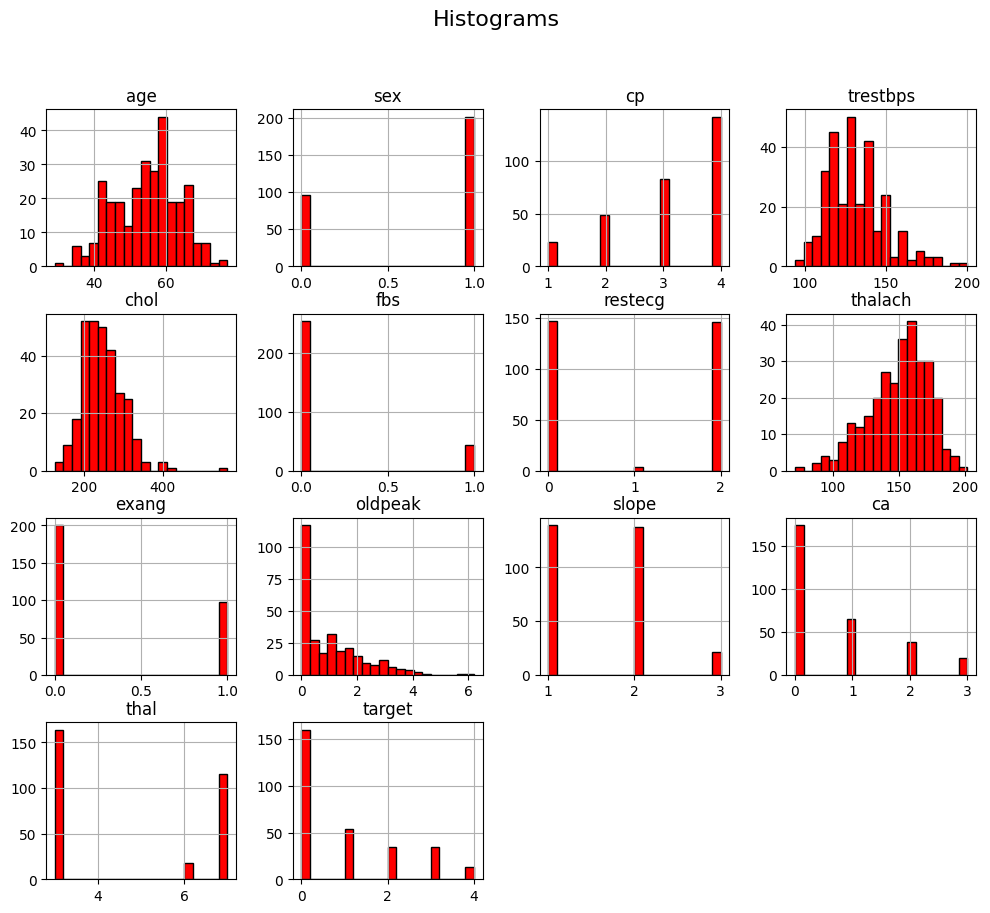

In [30]:
data.hist(figsize=(12,10),bins=20,color='r',edgecolor='black')
plt.suptitle("Histograms",fontsize=16)
plt.show()

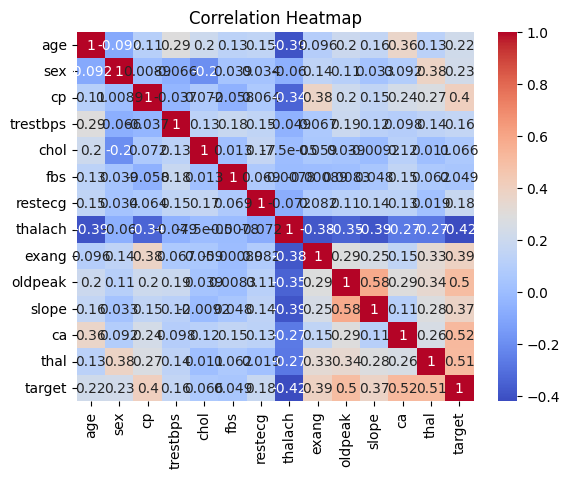

In [31]:
plt.Figure(figsize=(12,8))
corr=data.corr(numeric_only=True)
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

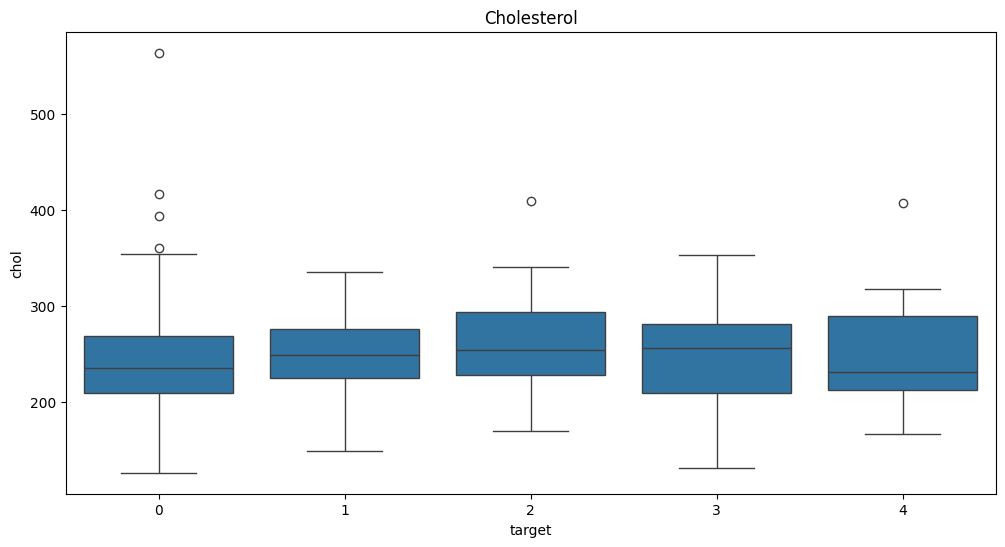

In [32]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='target', y='chol', data=data)
plt.title('Cholesterol')
plt.show()

In [33]:
data.to_csv('processed_data.csv', index=False)